In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors
import matplotlib.ticker as ticker

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

import gif
import imageio

In [10]:
PATH = '/usr/scratch/mont-fort17/dleonard/GW_paper/CNT_32/linear_results/CNT_biased_selfv_offdiag_1.0/'

In [11]:
DOS_TEST = np.loadtxt(PATH + 'DOS_0.dat').view(complex)
E = np.loadtxt(PATH + 'E.dat')
x = np.arange(12)

EE, X = np.meshgrid(E, x)

In [12]:
E.shape

(15000,)

In [13]:
DOS_TEST.shape

(15000, 12)

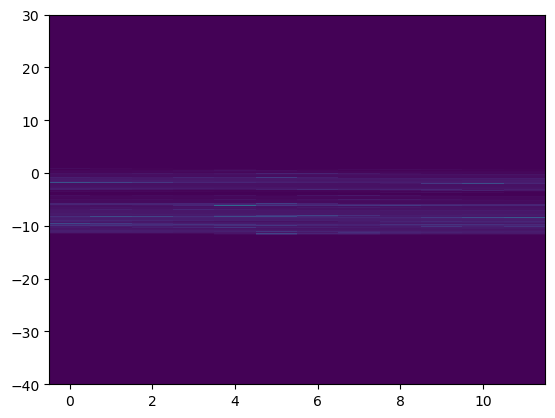

In [14]:
plt.pcolormesh(X, EE, DOS_TEST.T.real)

In [ ]:
@gif.frame
def plot_standard():
    plt.pcolormesh(X, EE, DOS_TEST.T.real)

In [24]:
@gif.frame
def plot_gold(PATH, i):

    font = {'weight' : 'normal',
	'size'   : 35}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    
    DOS_TEST = np.loadtxt(PATH + 'DOS_' + str(i) + '.dat').view(complex)
    E = np.loadtxt(PATH + 'E.dat')
    EFL = np.loadtxt(PATH + 'EFL.dat')
    EFR = np.loadtxt(PATH + 'EFR.dat')
    x = np.arange(12)
    x_fl = np.linspace(-0.5, 11.55, 100)
    Efl_dotted = EFL[i+1] * np.ones((20))
    Efr_dotted = EFR[i+1] * np.ones((20))

    EE, X = np.meshgrid(E, x)
    
    plt.figure(figsize = (15,12))
    ax1 = plt.gca()
    ax1.set_xlabel('Transport Direction' + ' ' + r'$\mathbf{x}$' + ' ' + r'$ [\mathbf{u.c.}]$')
    ax1.set_ylabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.pcolormesh(X, EE, DOS_TEST.T.real, cmap = 'gist_heat_r', vmin = 0, vmax = 160)
    cbar = plt.colorbar(plot, format = ticker.FuncFormatter(fmt_1))
    cbar.ax.set_ylabel('DOS' + ' ' + r'$[\mathbf{\left( eV\cdot nm ^3 \right) ^{-1}}]$')

    ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    plt.text(0.00-0.40, EFL[i+1] + 0.05, r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.text(11.55-0.90, EFR[i+1] + 0.05 , r'$\mathbf{E_{FR}}$', fontsize = 27)
    plt.ylim(-6,  -2.5)

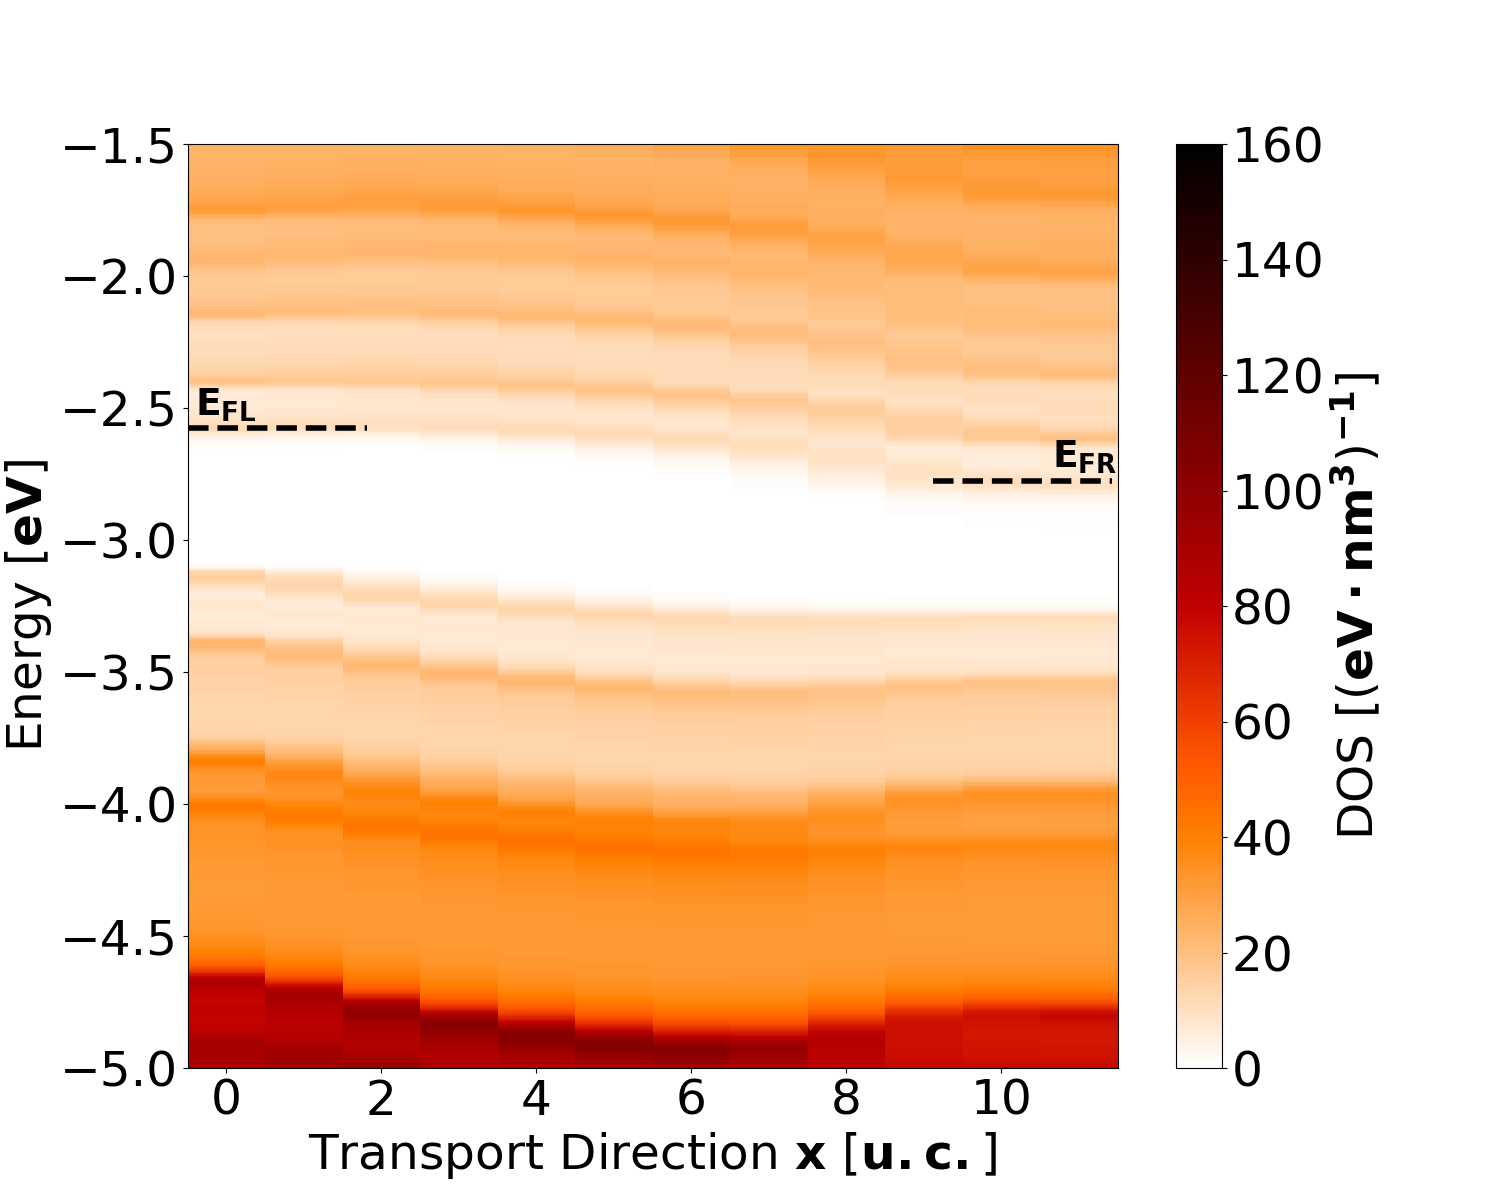

In [23]:
plot_gold(PATH, 98)

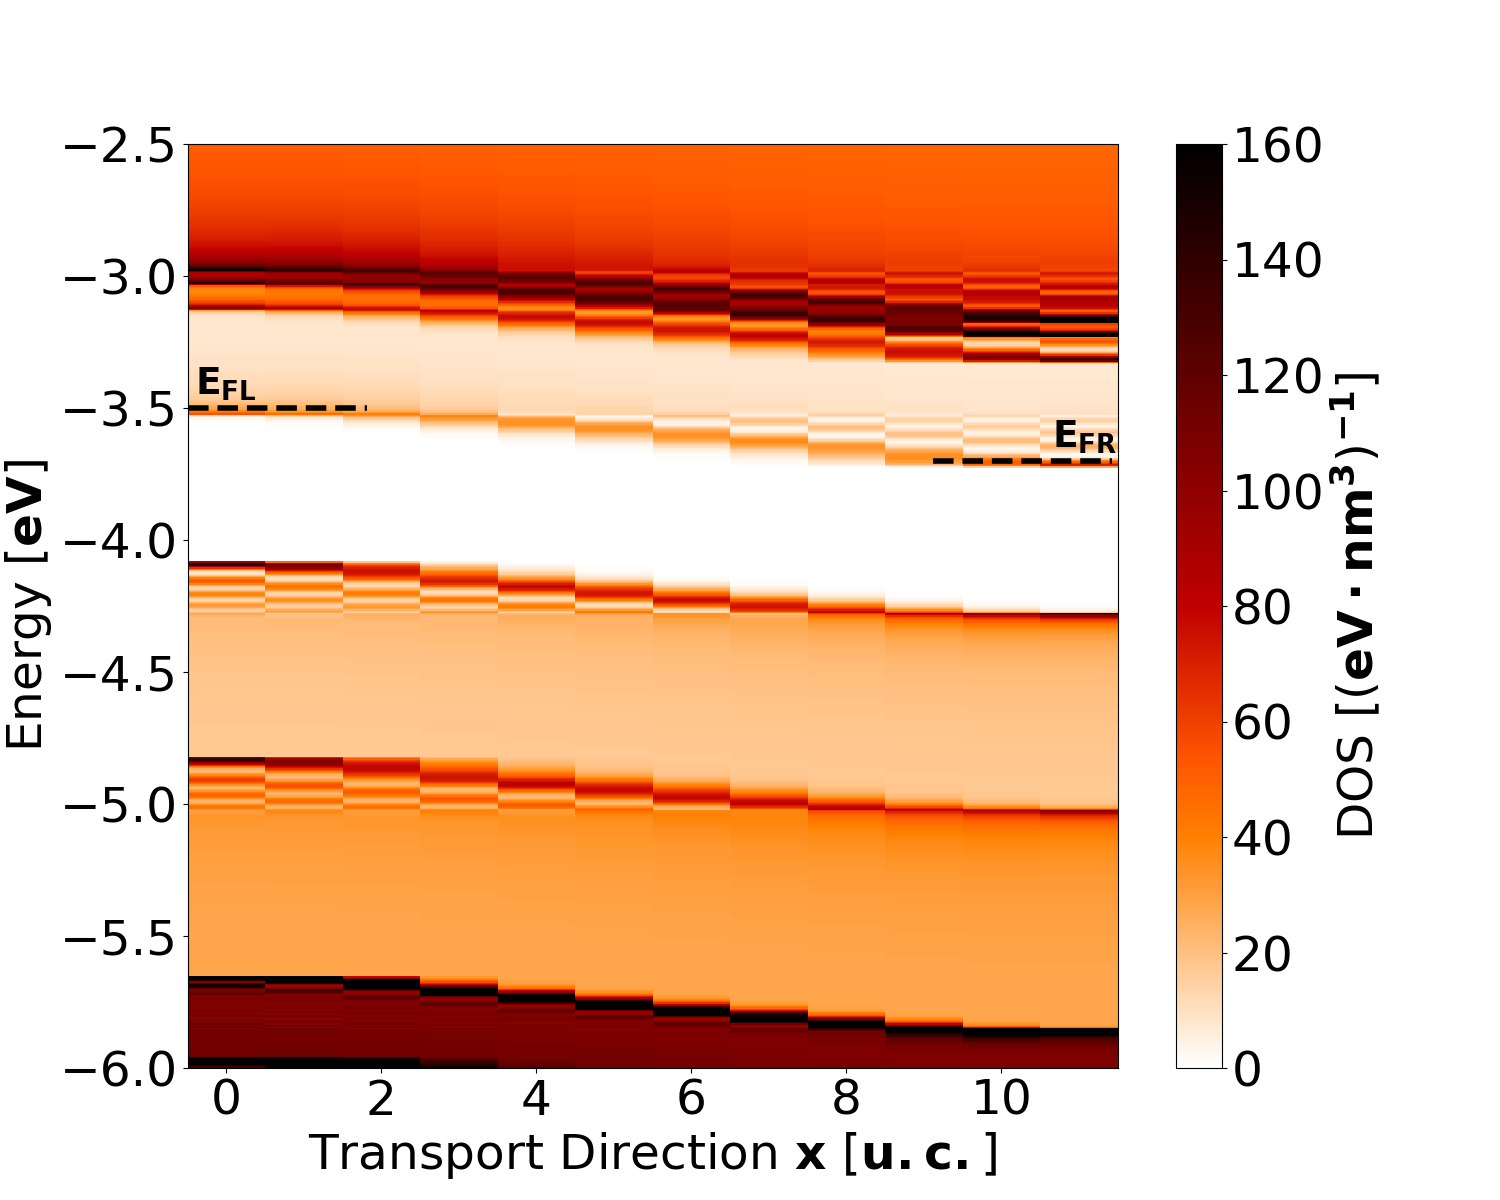

In [25]:
plot_gold(PATH, 0)

In [4]:
def plot_io(i):

    font = {'weight' : 'normal',
	'size'   : 35}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    
    DOS_TEST = np.loadtxt('DOS_' + str(i) + '.dat').view(complex)
    E = np.loadtxt('E.dat')
    EFL = np.loadtxt('EFL.dat')
    EFR = np.loadtxt('EFR.dat')
    x = np.arange(10)
    x_fl = np.linspace(-0.5, 11.55, 100)
    Efl_dotted = EFL[i+1] * np.ones((7))
    Efr_dotted = EFR[i+1] * np.ones((7))

    EE, X = np.meshgrid(E, x)
    
    fig = plt.figure(figsize = (13,12))
    ax1 = plt.gca()
    ax1.set_xlabel('Transport Direction' + ' ' + r'$\mathbf{x}$' + ' ' + r'$ [\mathbf{u.c.}]$')
    ax1.set_ylabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.pcolormesh(X, EE, DOS_TEST.T.real, cmap = 'gist_heat_r', vmin = 0, vmax = 250)
    cbar = plt.colorbar(plot, format = ticker.FuncFormatter(fmt_1))
    cbar.ax.set_ylabel('DOS' + ' ' + r'$[\mathbf{\left( eV\cdot nm ^3 \right) ^{-1}}]$')

    ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    plt.text(0.00+0.20, EFL[i] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.text(10.55-0.50, EFR[i] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)
    plt.ylim(-5, -3)
    return fig

In [ ]:
frames  = []
for i in range(200):
    fig = plot_io(i)
    canvas = FigureCanvas(fig)
    canvas.draw()
    image = np.array(canvas.renderer.buffer_rgba())

    frames.append(image)
    plt.clf()
    matplotlib.pyplot.close(fig)
imageio.mimsave('DOS_io.gif', frames, duration = 0.1)


In [42]:
@gif.frame
def plot_idE_gold(PATH, i):

    font = {'weight' : 'normal',
	'size'   : 28}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    
    IDE_TEST = np.loadtxt(PATH + 'IDE_' + str(i) + '.dat').view(complex)
    E = np.loadtxt(PATH + 'E.dat')
    EFL = np.loadtxt(PATH + 'EFL.dat')
    EFR = np.loadtxt(PATH + 'EFR.dat')
    x = np.arange(12)
    x_fl = np.linspace(-0.5, 10.55, 100)
    Efl_dotted = EFL[i+1] * np.ones((7))
    Efr_dotted = EFR[i+1] * np.ones((7))

    EE, X = np.meshgrid(E, x)
    
    plt.figure(figsize = (16,12))
    ax1 = plt.gca()
    ax1.set_xlabel('Transport Direction' + ' ' + r'$\mathbf{x}$' + ' ' + r'$ [\mathbf{u.c.}]$')
    ax1.set_ylabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    #plot = plt.pcolormesh(X, EE, IDE_TEST.T.real, cmap = plt.cm.coolwarm, norm = colors.SymLogNorm(linthresh = 1e-8, linscale = 2, vmin = -1e-7, vmax = 1e-7), shading = 'auto')
    plot = plt.pcolormesh(X, EE, IDE_TEST.T.real, cmap = plt.cm.coolwarm, vmax = 0.2, vmin = -0.2)
    #norm = colors.SymLogNorm(linthresh = 0.01, linscale = 0.01, vmin = -1.2, vmax = 1.2), shading = 'auto'
    cbar = plt.colorbar(plot, format = ticker.FuncFormatter(fmt))
    cbar.ax.set_ylabel('IDE' + ' ' + r'$[\mathbf{A \cdot \left( eV\cdot nm ^2 \right) ^{-1}}]$')

    ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    plt.text(0.00-0.40, EFL[i+1]+0.025, r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.text(10.55-0.90, EFR[i+1]+0.025, r'$\mathbf{E_{FR}}$', fontsize = 27)
    plt.ylim(-2.9, -2.4)
    plt.xlim(-0.5, 10.55)

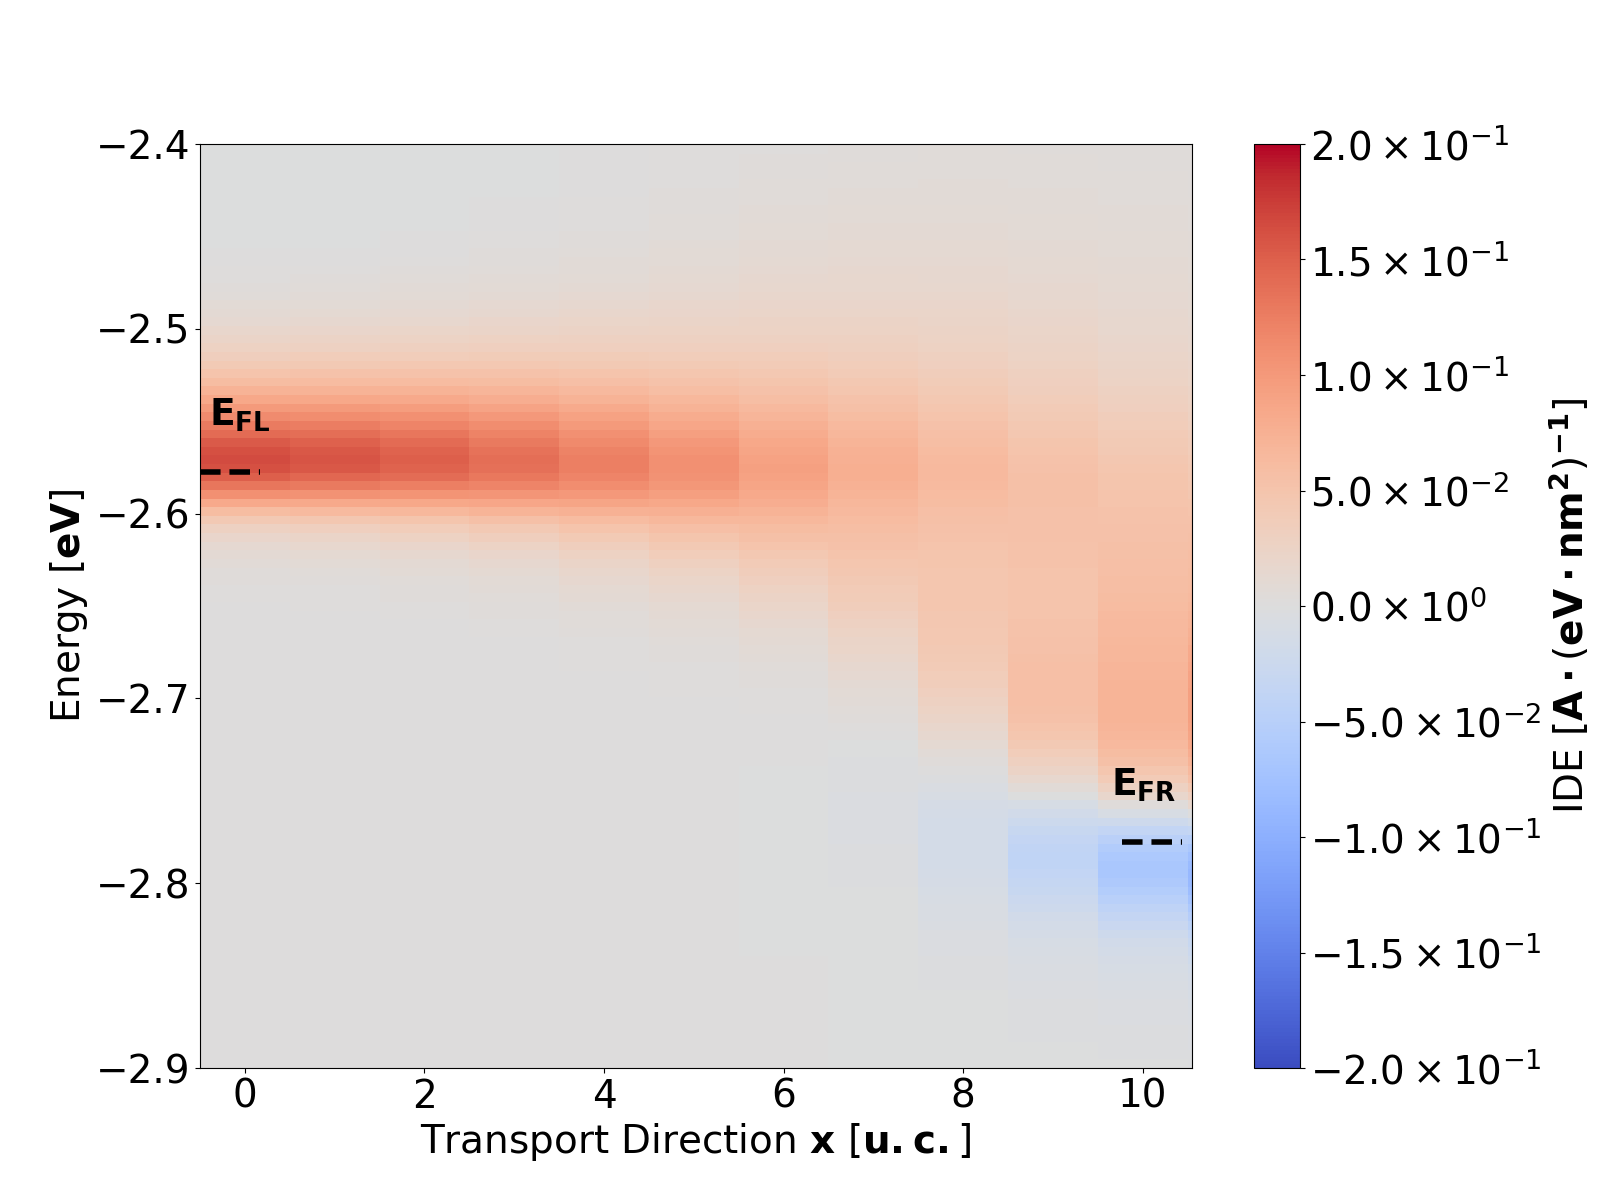

In [43]:
plot_idE_gold(PATH, 98)

Conservation condition satisfied at iteration 0
Conservation condition satisfied at iteration 88
Conservation condition satisfied at iteration 89
Conservation condition satisfied at iteration 90
Conservation condition satisfied at iteration 91
Conservation condition satisfied at iteration 92
Conservation condition satisfied at iteration 93
Conservation condition satisfied at iteration 94
Conservation condition satisfied at iteration 95
Conservation condition satisfied at iteration 96
Conservation condition satisfied at iteration 97
Conservation condition satisfied at iteration 98
Conservation condition satisfied at iteration 99


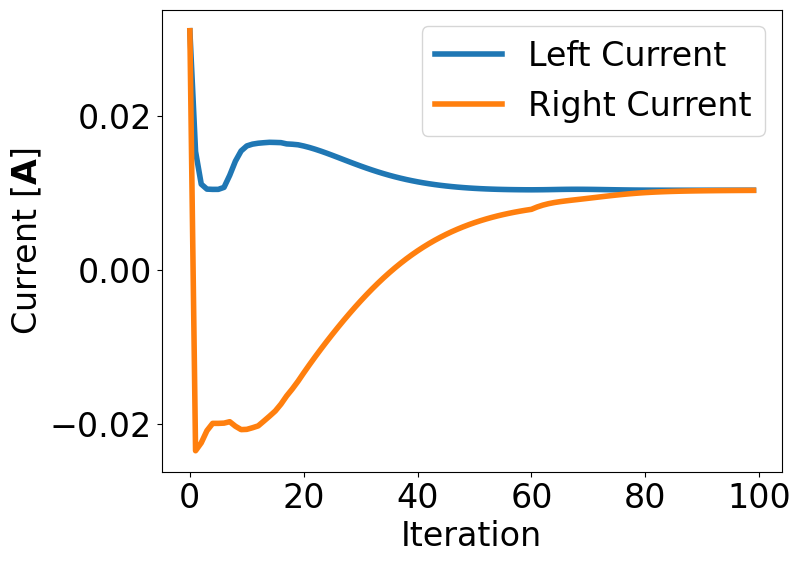

In [45]:
num_iter = 100
nblocks = 12
font = {'weight' : 'normal',
'size'   : 24}
matplotlib.rc('font', **font)

ID_L = np.zeros((num_iter)) # left current
ID_R = np.zeros((num_iter)) # right current
ID_M = np.zeros((num_iter)) # middle current
conservation_cond = np.zeros((num_iter))
E = np.loadtxt(PATH + 'E.dat')
dE = E[1] - E[0]
for i in range(num_iter):
    IDE_temp = np.loadtxt(PATH + 'IDE_' + str(i) + '.dat').view(complex)
    ID_L[i] = np.sum(IDE_temp.real, axis = 0)[0] * dE
    ID_R[i] = np.sum(IDE_temp.real, axis = 0)[-2] * dE
    ID_M[i] = np.sum(IDE_temp.real, axis = 0)[nblocks//2] * dE

    conservation_cond[i] = (ID_L[i]-ID_R[i])/(ID_R[i])
    if np.abs(conservation_cond[i]) < 0.01:
        print('Conservation condition satisfied at iteration', i)

plt.figure(figsize=(8,6))
plt.plot(np.arange(num_iter), ID_L, label = 'Left Current', linewidth = 4)
plt.plot(np.arange(num_iter), ID_R, label = 'Right Current', linewidth = 4)
#plt.plot(np.arange(num_iter), ID_M, label = 'Middle Current')
plt.xlabel('Iteration')
plt.ylabel('Current' + ' ' + r'$[\mathbf{A}]$')
plt.legend()
#plt.ylim([-1e-8, 1e-8])
plt.show()

#print("the best converged iteration is ", np.argmin(np.abs(conservation_cond[100:])))


In [50]:
PATH1 = '/usr/scratch/mont-fort17/dleonard/GW_paper/CNT_32/linear_results/CNT_biased_selfv_offdiag_1.5/'

(-4.5, 0.0)

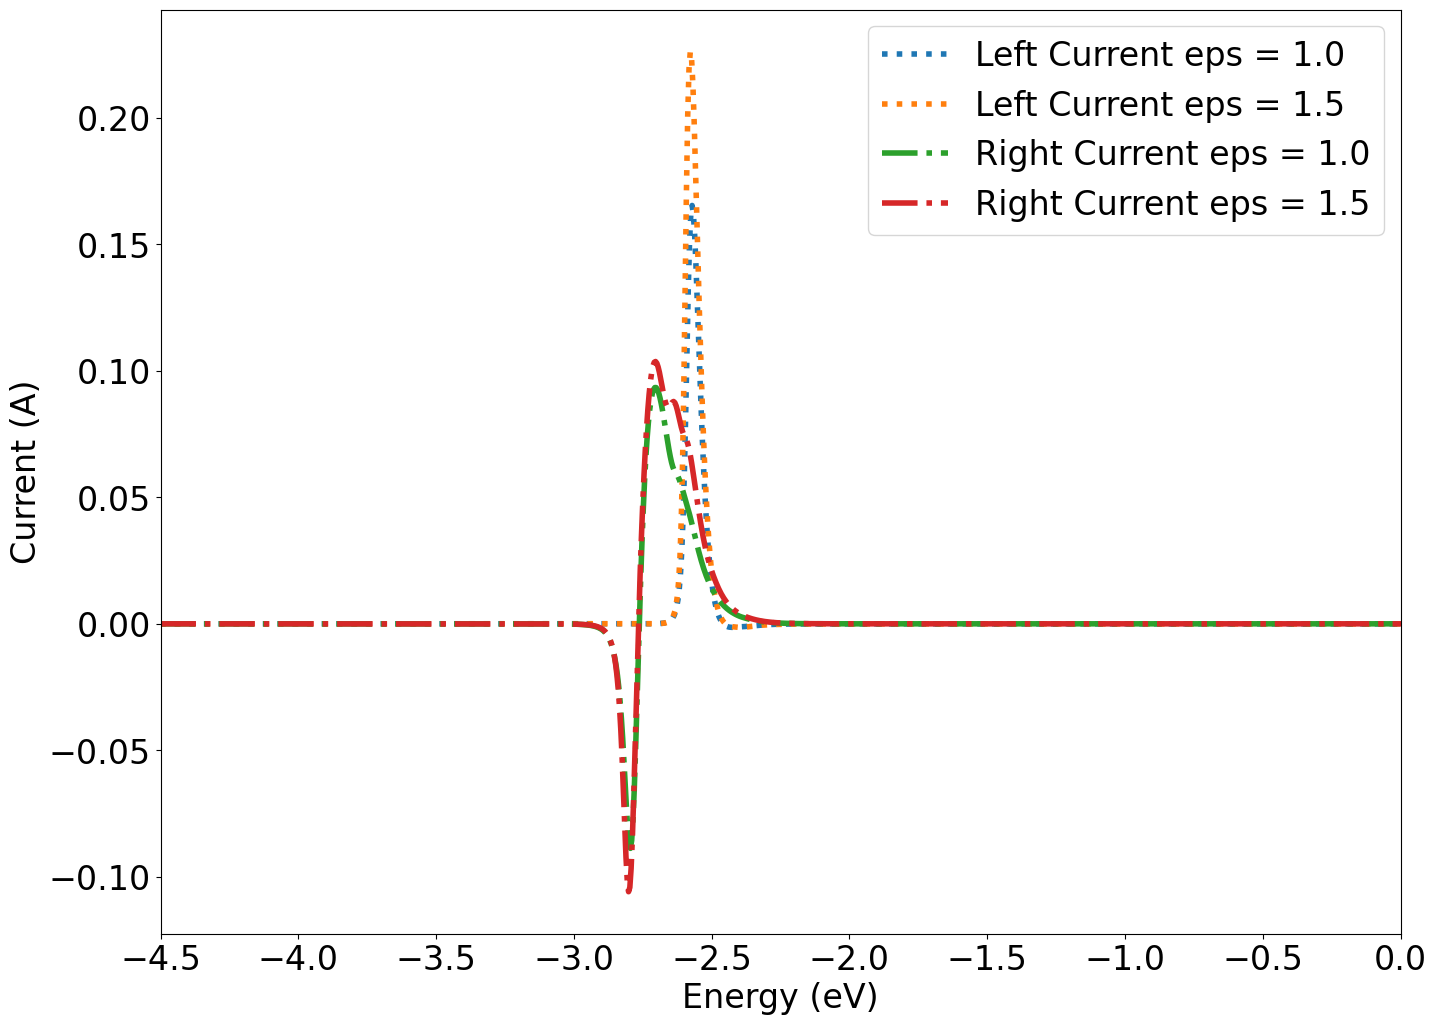

In [78]:
iter = 99
font = {'weight' : 'normal',
'size'   : 24}
matplotlib.rc('font', **font)
IDE_temp = np.loadtxt(PATH + 'IDE_' + str(iter) + '.dat').view(complex)
IDE_temp1 = np.loadtxt(PATH1 + 'IDE_' + str(iter-15) + '.dat').view(complex)
plt.figure(figsize = (16, 12))
plt.plot(E, IDE_temp.real[:,0], label = 'Left Current eps = 1.0', linewidth = 4, linestyle = ':')
plt.plot(E+0.278, IDE_temp1.real[:,0], label = 'Left Current eps = 1.5', linewidth = 4, linestyle = ':')
# plt.plot(E, IDE_temp.real[:,1], label = 'Left Current', linewidth = 4)
# plt.plot(E, IDE_temp.real[:,3], label = 'Left Current', linewidth = 4)
# plt.plot(E, IDE_temp.real[:,5], label = 'Left Current', linewidth = 4)
# plt.plot(E, IDE_temp.real[:,7], label = 'Left Current', linewidth = 4)
plt.plot(E, IDE_temp.real[:,-1], label = 'Right Current eps = 1.0', linewidth = 4, linestyle = 'dashdot')
plt.plot(E+0.278, IDE_temp1.real[:,-1], label = 'Right Current eps = 1.5', linewidth = 4, linestyle = 'dashdot')
plt.xlabel('Energy (eV)')
plt.ylabel('Current (A)')
plt.legend()
plt.xlim(-4.5, 0)

In [8]:
iter = 110
IDE_temp = np.loadtxt('IDE_' + str(iter) + '.dat').view(complex)
print(np.sum(IDE_temp.real, axis = 0)[0] * dE)
print(np.sum(IDE_temp.real, axis = 0)[-2] * dE)


0.01250063723118185
0.012497617954550984


Conservation condition satisfied at iteration 0
Conservation condition satisfied at iteration 81
Conservation condition satisfied at iteration 82
Conservation condition satisfied at iteration 83
Conservation condition satisfied at iteration 84
Conservation condition satisfied at iteration 85
Conservation condition satisfied at iteration 86
Conservation condition satisfied at iteration 87
Conservation condition satisfied at iteration 88
Conservation condition satisfied at iteration 89
Conservation condition satisfied at iteration 90
Conservation condition satisfied at iteration 91
Conservation condition satisfied at iteration 92
Conservation condition satisfied at iteration 93
Conservation condition satisfied at iteration 94
Conservation condition satisfied at iteration 95
Conservation condition satisfied at iteration 96
Conservation condition satisfied at iteration 97
Conservation condition satisfied at iteration 98
Conservation condition satisfied at iteration 99


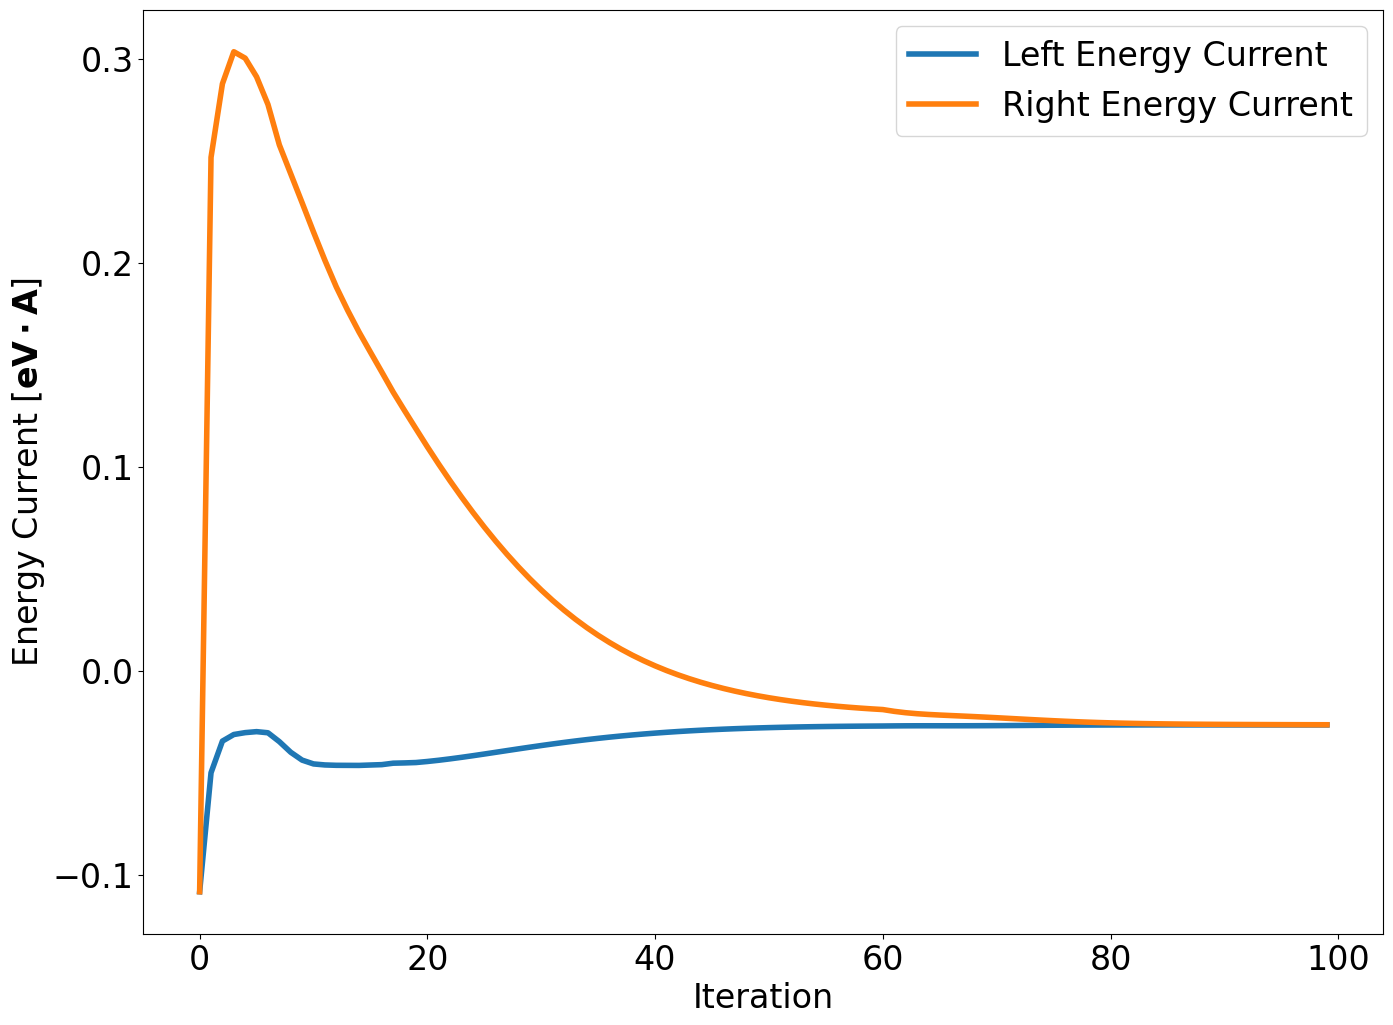

In [59]:
num_iter = 100
nblocks = 10
font = {'weight' : 'normal',
'size'   : 24}
matplotlib.rc('font', **font)

ID_L = np.zeros((num_iter)) # left energy current
ID_R = np.zeros((num_iter)) # right energy current
ID_M = np.zeros((num_iter)) # middle energy current
E = np.loadtxt(PATH +'E.dat')
dE = E[1] - E[0]
for i in range(num_iter):
    IDE_temp = np.loadtxt(PATH + 'IDE_' + str(i) + '.dat').view(complex)
    ID_L[i] = np.sum(IDE_temp.real*np.tile(E, (IDE_temp.shape[1],1)).T, axis = 0)[0] * dE
    ID_R[i] = np.sum(IDE_temp.real*np.tile(E, (IDE_temp.shape[1],1)).T, axis = 0)[-1] * dE
    ID_M[i] = np.sum(IDE_temp.real*np.tile(E, (IDE_temp.shape[1],1)).T, axis = 0)[nblocks//2] * dE

    conservation_cond = (ID_L[i]-ID_R[i])/(ID_R[i])
    if np.abs(conservation_cond) < 0.04:
        print('Conservation condition satisfied at iteration', i)

plt.figure(figsize=(16,12))
plt.plot(np.arange(num_iter), ID_L, label = 'Left Energy Current', linewidth = 4)
plt.plot(np.arange(num_iter), ID_R, label = 'Right Energy Current', linewidth = 4)
#plt.plot(np.arange(num_iter), ID_M, label = 'Middle Current')
plt.xlabel('Iteration')
plt.ylabel('Energy Current' + ' ' + r'$[\mathbf{eV \cdot A}]$')
plt.legend()
plt.show()

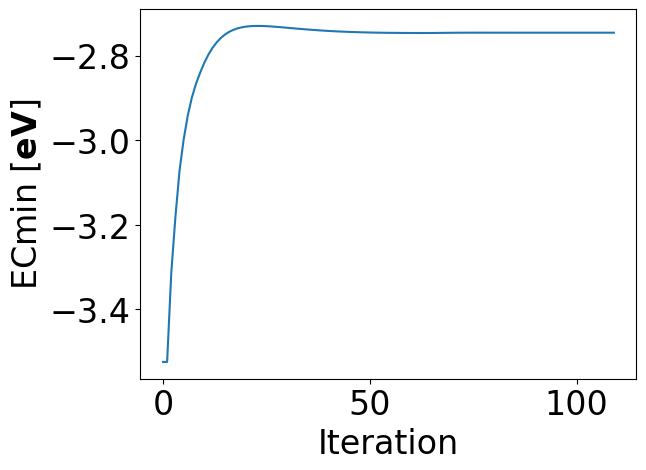

In [10]:
num_iter = 110
font = {'weight' : 'normal',
'size'   : 24}
matplotlib.rc('font', **font)
ECmin_vec = np.loadtxt('ECmin.dat')
plt.figure()
plt.plot(np.arange(num_iter), ECmin_vec[0:num_iter])
plt.xlabel('Iteration')
plt.ylabel('ECmin' + ' ' + r'$[\mathbf{eV}]$')
plt.show()


In [68]:
def plot_line(PATH, i):

    font = {'weight' : 'normal',
	'size'   : 35}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    DOS_ZERO = np.loadtxt(PATH + 'DOS_0.dat').view(complex)
    DOS_TEST = np.loadtxt(PATH + 'DOS_' + str(i) + '.dat').view(complex)
    
    E = np.loadtxt(PATH + 'E.dat')
    EFL = np.loadtxt(PATH + 'EFL.dat')
    EFR = np.loadtxt(PATH + 'EFR.dat')
    x = np.arange(10)
    x_fl = np.linspace(-0.5, 9.55, 100)
    #Efl_dotted = EFL[i] * np.ones((7))
    #Efr_dotted = EFR[i] * np.ones((7))
    shift = EFL[i+1] - EFL[0]
    
    plt.figure(figsize = (15,12))
    ax1 = plt.gca()
    ax1.set_ylabel('DOS' + ' ' + r'$[\mathbf{\left( eV\cdot nm ^3 \right) ^{-1}}]$')
    ax1.set_xlabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.plot(E, DOS_ZERO.T.real[6,:], linewidth = 4, label = "Ballistic")
    plt.plot(E-shift, DOS_TEST.T.real[6,:], linewidth = 4, label = "SC-GW eps = 1.0")
    #y_lim = np.max(DOS_TEST.T.real[0,:])
    y_lim = 250
    NE = E.shape[0]

    plt.plot(EFL[0]*np.ones((100,)), np.linspace(0, y_lim, 100), color = 'black', linestyle = 'dashed', linewidth = '4', label = 'Fermi Level')
    plt.ylim(0, y_lim + 2)
    plt.xlim(-10, 1)
    #plt.text(EFL[0] - 1 , 4/5 * y_lim , r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.legend()
    plt.show()

    #ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    #ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    #plt.text(0.00+0.20, EFL[i] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    #plt.text(8.55-0.50, EFR[i] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)


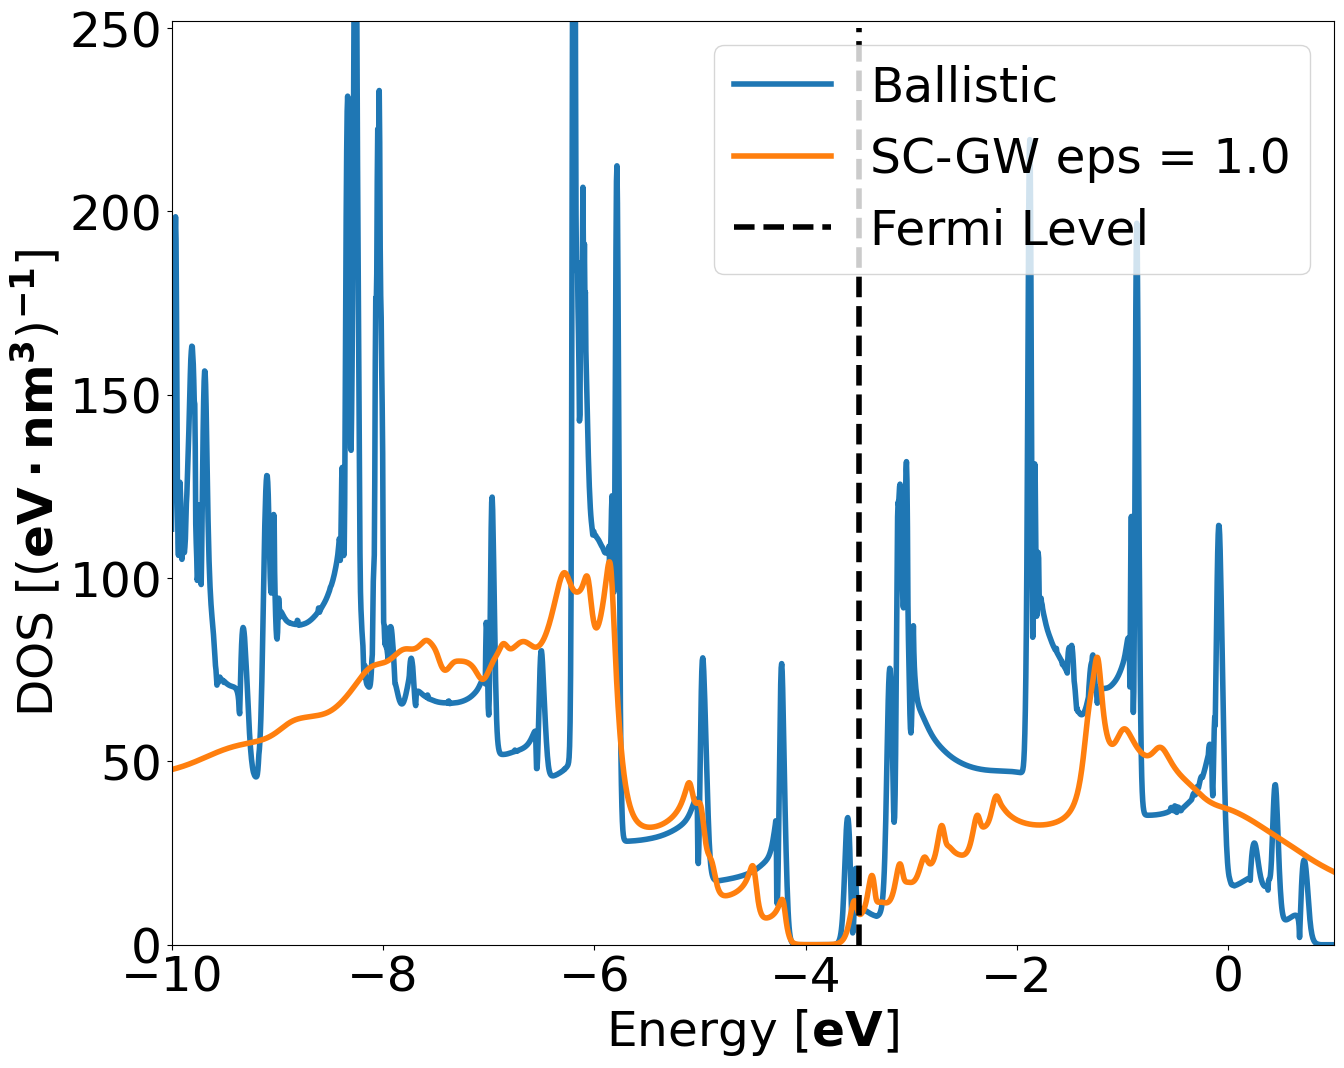

In [69]:
plot_line(PATH, 75)

In [76]:
def plot_line_compare(PATH, PATH1,  i):

    font = {'weight' : 'normal',
	'size'   : 35}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    DOS_ZERO = np.loadtxt(PATH + 'DOS_0.dat').view(complex)
    DOS_TEST = np.loadtxt(PATH + 'DOS_' + str(i) + '.dat').view(complex)
    DOS_TEST1 = np.loadtxt(PATH1 + 'DOS_' + str(i-15) + '.dat').view(complex)
    
    E = np.loadtxt(PATH + 'E.dat')
    EFL = np.loadtxt(PATH + 'EFL.dat')
    EFR = np.loadtxt(PATH + 'EFR.dat')
    x = np.arange(10)
    x_fl = np.linspace(-0.5, 9.55, 100)
    #Efl_dotted = EFL[i] * np.ones((7))
    #Efr_dotted = EFR[i] * np.ones((7))
    shift = EFL[i+1] - EFL[0]
    
    plt.figure(figsize = (15,12))
    ax1 = plt.gca()
    ax1.set_ylabel('DOS' + ' ' + r'$[\mathbf{\left( eV\cdot nm ^3 \right) ^{-1}}]$')
    ax1.set_xlabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.plot(E, DOS_ZERO.T.real[6,:], linewidth = 4, label = "Ballistic")
    plt.plot(E-shift, DOS_TEST.T.real[6,:], linewidth = 4, label = "SC-GW eps = 1.0")
    plt.plot(E-shift+0.278, DOS_TEST1.T.real[6,:], linewidth = 6, label = "SC-GW eps = 1.5", linestyle = ':')
    #y_lim = np.max(DOS_TEST.T.real[0,:])
    y_lim = 160
    NE = E.shape[0]

    plt.plot(EFL[0]*np.ones((100,)), np.linspace(0, y_lim, 100), color = 'black', linestyle = 'dashed', linewidth = '4', label = 'Fermi Level')
    plt.ylim(0, y_lim + 2)
    plt.xlim(-8, -1)
    #plt.text(EFL[0] - 1 , 4/5 * y_lim , r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.legend()
    plt.show()

    #ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    #ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    #plt.text(0.00+0.20, EFL[i] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    #plt.text(8.55-0.50, EFR[i] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)

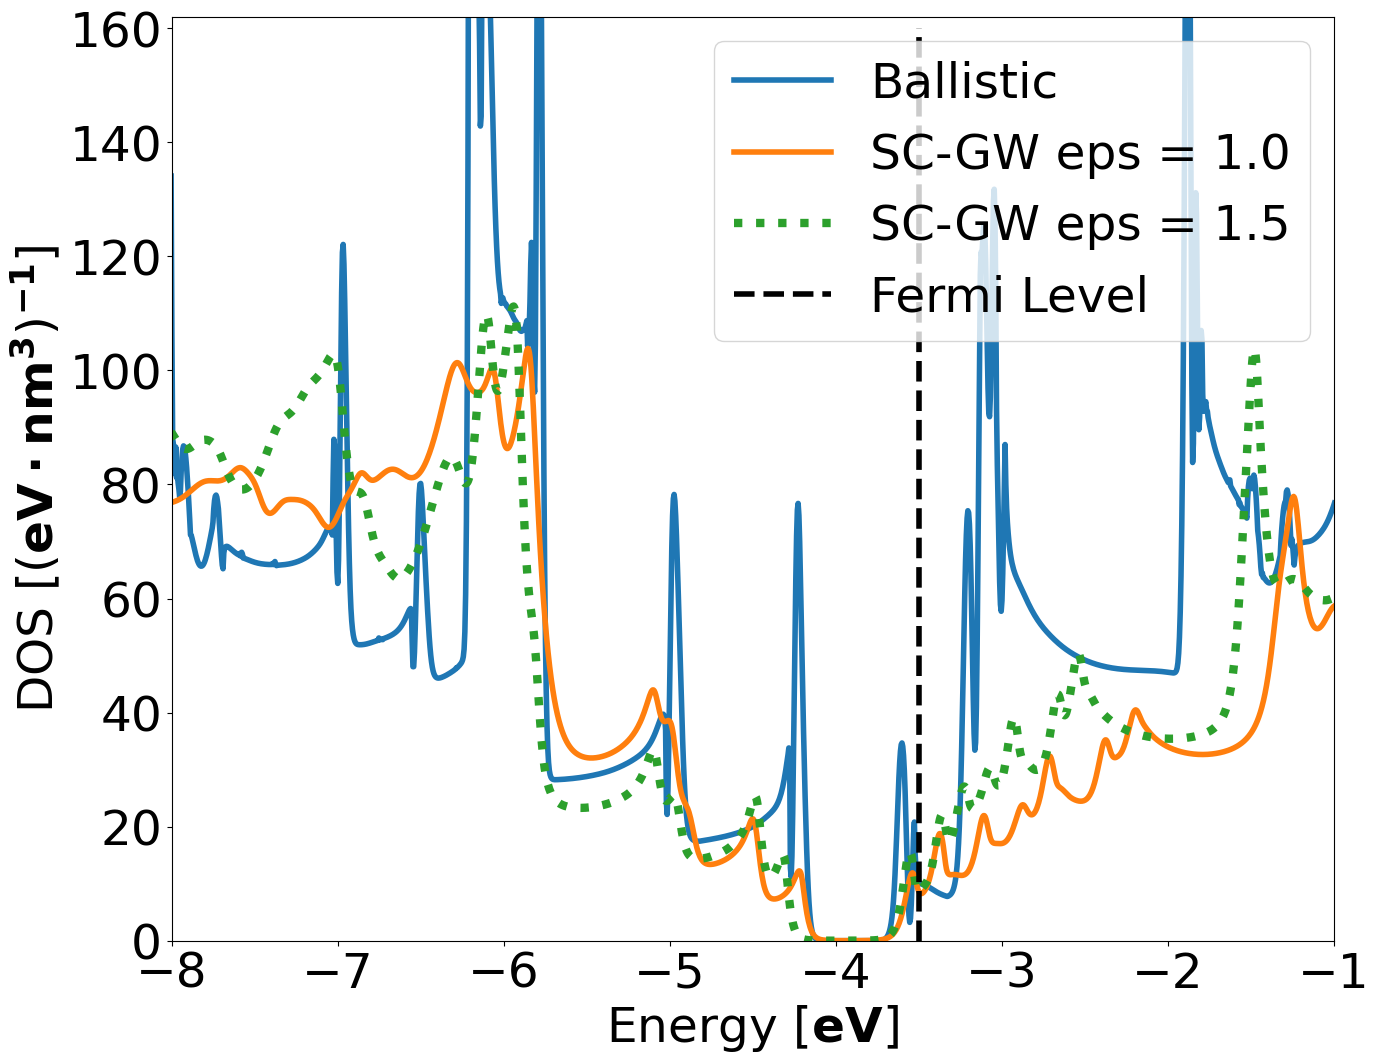

In [77]:
plot_line_compare(PATH, PATH1, 99)

In [34]:
def plot_line_W(i):

    font = {'weight' : 'normal',
	'size'   : 35}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    DOS_ZERO = np.loadtxt('DOSW_0.dat').view(complex)
    DOS_TEST = np.loadtxt('DOSW_' + str(i) + '.dat').view(complex)
    
    E = np.loadtxt('E.dat')
    EFL = np.loadtxt('EFL.dat')
    EFR = np.loadtxt('EFR.dat')
    NE = E.shape[0]
    range_E = E[-1] - E[0]
    E_symm = np.linspace(0, range_E, NE)


    x = np.arange(10)
    x_fl = np.linspace(-0.5, 9.55, 100)
    #Efl_dotted = EFL[i] * np.ones((7))
    #Efr_dotted = EFR[i] * np.ones((7))
    #shift = EFL[i] - EFL[0]
    
    plt.figure(figsize = (15,12))
    ax1 = plt.gca()
    ax1.set_ylabel('DOS' + ' ' + r'$[\mathbf{\left( eV\cdot nm ^3 \right) ^{-1}}]$')
    ax1.set_xlabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.plot(E_symm, DOS_ZERO.T.real[0,:], linewidth = 4, label = "Ballistic")
    plt.plot(E_symm, DOS_TEST.T.real[0,:], linewidth = 4, label = "SC-GW at iteration " + str(i))
    #y_lim = np.max(DOS_TEST.T.real[0,:])
    y_lim = 50
    

    #plt.plot(EFL[0]*np.ones((100,)), np.linspace(0, y_lim, 100), color = 'black', linestyle = 'dashed', linewidth = '4', label = 'Fermi Level')
    plt.ylim(-10, y_lim + 2)
    plt.xlim(0, range_E)
    #plt.text(EFL[0] - 1 , 4/5 * y_lim , r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.legend()
    plt.show()

    #ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    #ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    #plt.text(0.00+0.20, EFL[i] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    #plt.text(8.55-0.50, EFR[i] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)


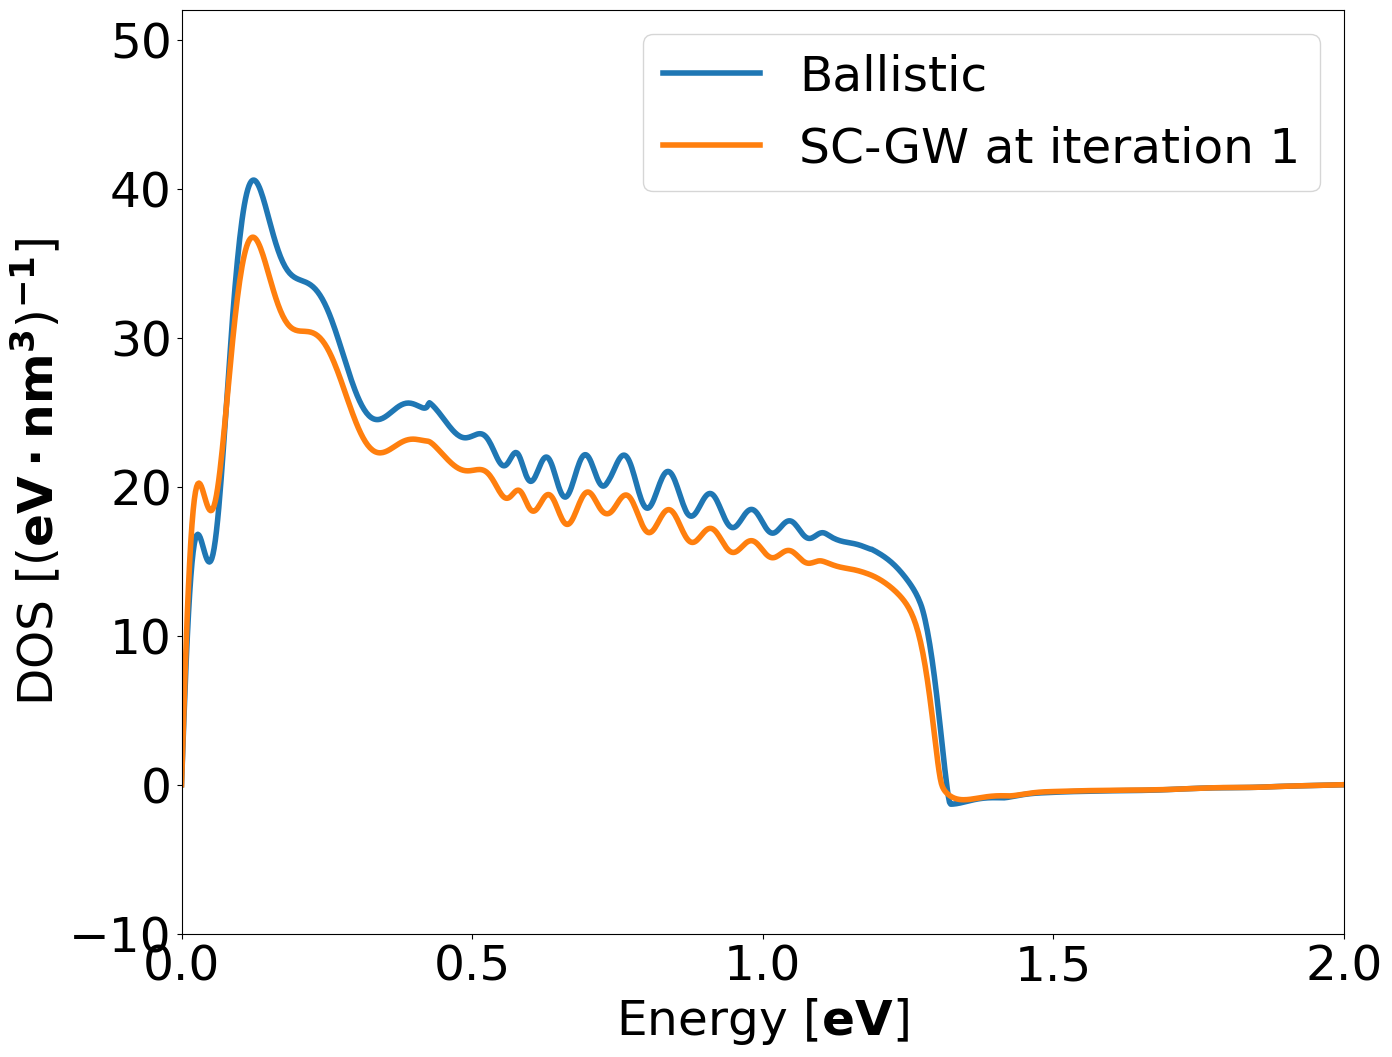

In [35]:
plot_line_W(1)